In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, auc
from xgboost import XGBClassifier, XGBRFClassifier
import function as fnc

# Content

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

# 1 Initial data processing

In [2]:
# importing dataset
df_raw = pd.read_csv("creditcard.csv")

In [3]:
df_raw

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
# checking data types and possible null data
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

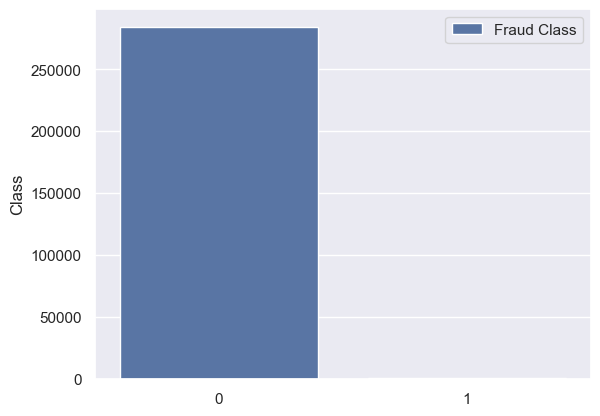

In [5]:
# ploting difference between Class 0 (legit) and Class 1 (Fraudulent) tarnsactions. Confirming high unbalanced dataset, as described before.
sns.set(style="darkgrid")
sns.barplot(x=df_raw["Class"].value_counts().index, y=df_raw["Class"].value_counts(), label="Fraud Class")
plt.legend()
plt.show()

In [6]:
# double-checking the unbalancing scale of the dataset
df_raw["Class"].value_counts(normalize=True)*100

0    99.827251
1     0.172749
Name: Class, dtype: float64

# 2 Estimate the current losses due to fraudulent transactions

In [7]:
# some measures of central tendency and dispersion for each transaction class
raw_est_df = df_raw.groupby("Class").agg(["mean", "median", "std", "sum"])["Amount"]
raw_est_df

,mean,median,std,sum
Class,,,,
0,88.291022,22.00,250.105092,25102462.04
1,122.211321,9.25,256.683288,60127.97


In [8]:
# double checking last transaction timedelta from the first transaction (hours)
df_raw["Time"].iloc[-1]/3600

47.99777777777778

In [9]:
legit_rev = raw_est_df.loc[0, 'sum']/2
fraud_tran = raw_est_df.loc[1, 'sum']/2
print(f"Revenue per day of legit transactions: ${legit_rev:,.2f}.")
print(f"Fraudulent transactions per day:         - ${fraud_tran:,.2f}.")
print(f"Net revenue per day:                   ${(legit_rev - fraud_tran):,.2f}.")


Revenue per day of legit transactions: $12,551,231.02.
Fraudulent transactions per day:         - $30,063.99.
Net revenue per day:                   $12,521,167.04.


# 3 Exploratory Data Analysis (EDA)

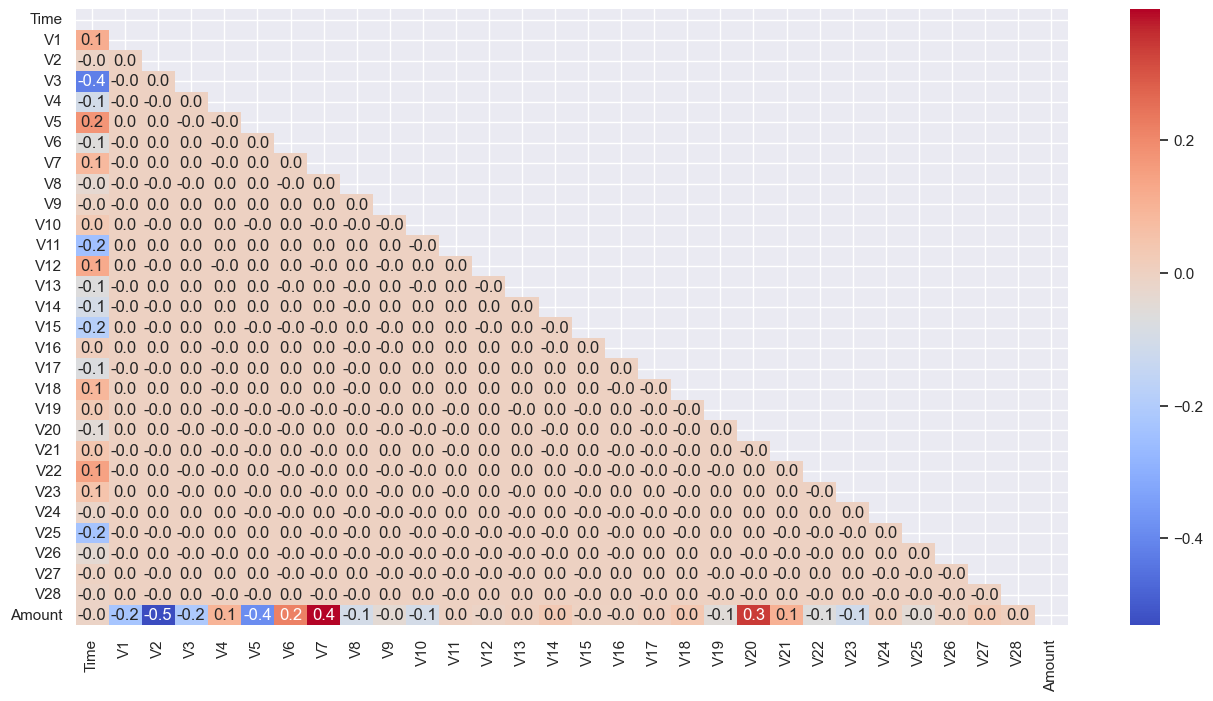

In [12]:
# plotting feature correlation heatmap for the dataset
plt.figure(figsize=(16, 8))
sns.heatmap(df_raw.drop(columns="Class").corr(), annot=True, fmt=".1f", mask=np.triu(np.ones_like(df_raw.drop(columns="Class").corr())), cmap="coolwarm");

Features Correlation heatmap shows us that there are no strong correlation between the features. Besides tree-based models, classifications regressors (Logistic Regressors for instance) could also be a good fit for the model training.

# 4 Training models

In [13]:
# splitting train/test sets
target = "Class"
X = df_raw.drop(columns=target)
y = df_raw[target]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 4.1 Logistic regression

### 4.1.1 Unbalanced class weight

In [19]:
logreg = LogisticRegression(random_state=42)

In [20]:
logreg.fit(X_train, y_train)

c:\Users\rafae\Desktop\repos\fraud_detection\venv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [21]:
y_pred_logreg = logreg.predict(X_test)

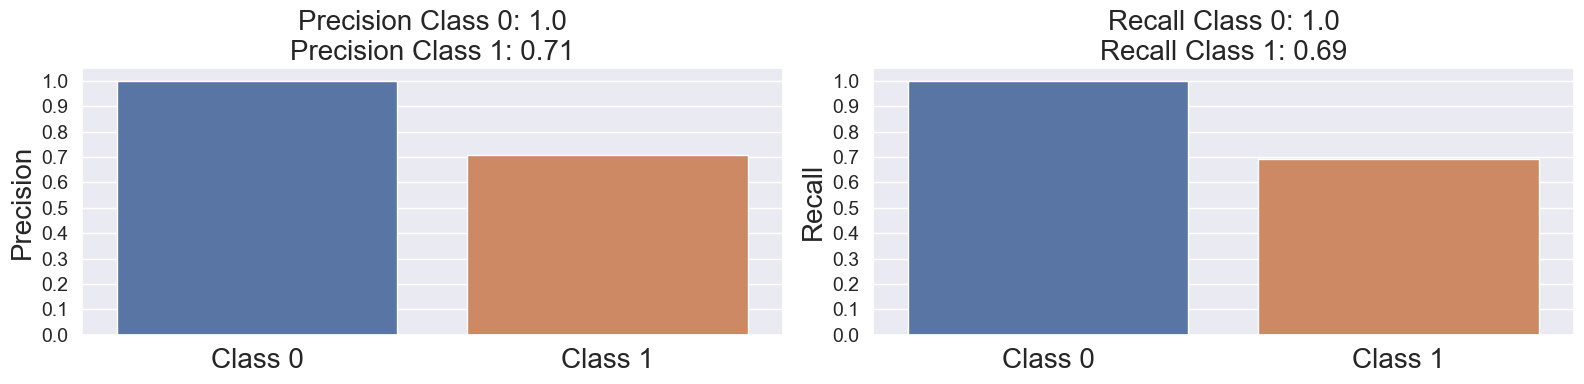

In [23]:
fnc.plot_precision_recall(y_test, y_pred_logreg)

In [24]:
# complete model metrics
print(classification_report(y_test, y_pred_logreg))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.71      0.69      0.70        98

    accuracy                           1.00     56962
   macro avg       0.85      0.85      0.85     56962
weighted avg       1.00      1.00      1.00     56962



### 4.1.2 Balanced class weight

In [25]:
logreg_bal = LogisticRegression(class_weight="balanced", random_state=42)
logreg_bal.fit(X_train, y_train)
y_pred_logreg_bal = logreg_bal.predict(X_test)

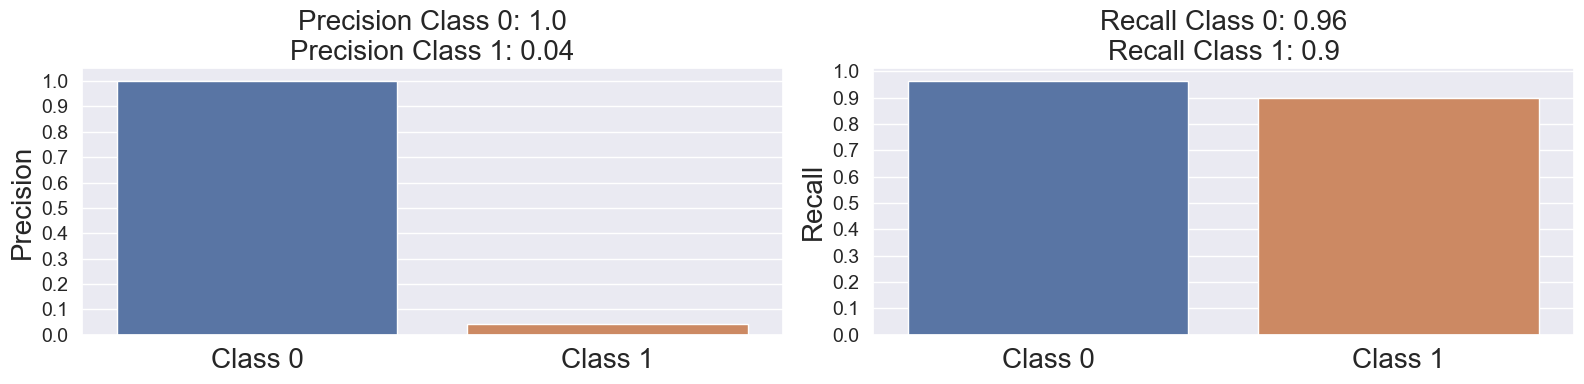

In [26]:
fnc.plot_precision_recall(y_test, y_pred_logreg_bal)

In [27]:
print(classification_report(y_test, y_pred_logreg_bal))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.04      0.90      0.08        98

    accuracy                           0.96     56962
   macro avg       0.52      0.93      0.53     56962
weighted avg       1.00      0.96      0.98     56962



## 4.2 Decision tree

In [28]:
dtree = DecisionTreeClassifier(class_weight="balanced", random_state=42)
dtree.fit(X_train, y_train)
y_pred_dtree = dtree.predict(X_test)

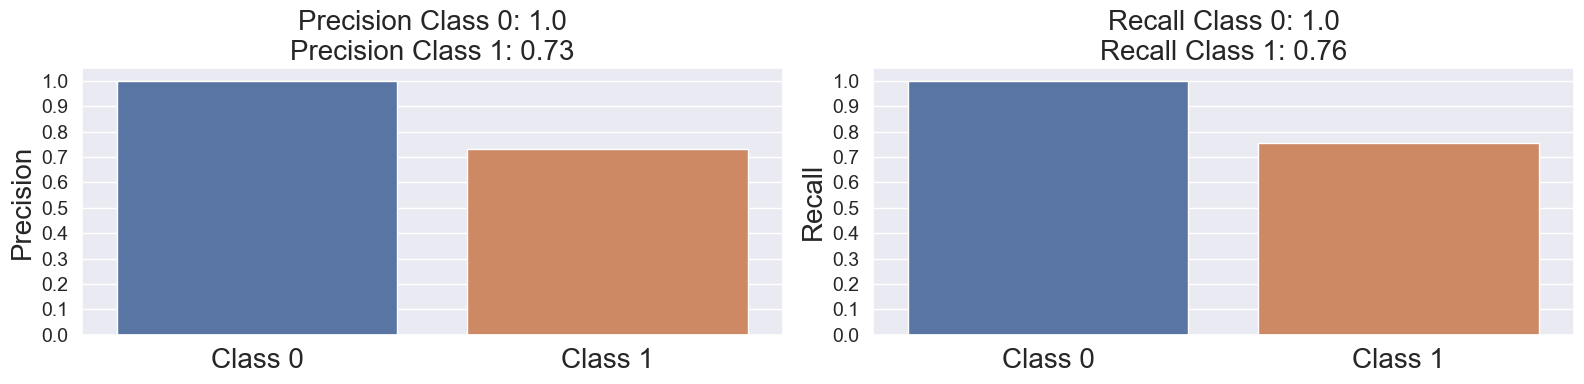

In [29]:
fnc.plot_precision_recall(y_test, y_pred_dtree)

In [30]:
print(classification_report(y_test, y_pred_dtree))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.73      0.76      0.74        98

    accuracy                           1.00     56962
   macro avg       0.87      0.88      0.87     56962
weighted avg       1.00      1.00      1.00     56962



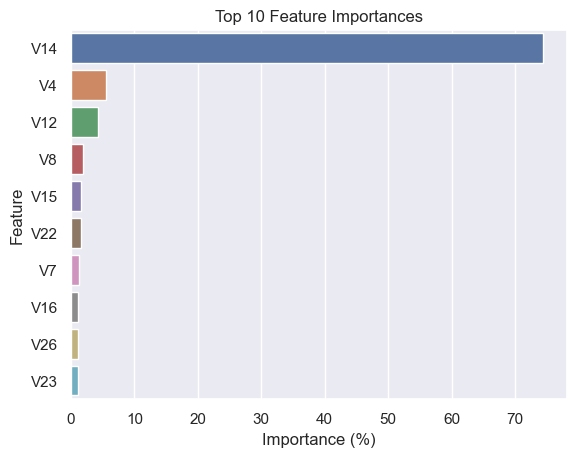

In [31]:
fnc.plot_feature_importances(dtree)

## 4.3 Random forest

In [32]:
randfor = RandomForestClassifier(class_weight="balanced", random_state=42)
randfor.fit(X_train, y_train)
y_pred_randfor = randfor.predict(X_test)

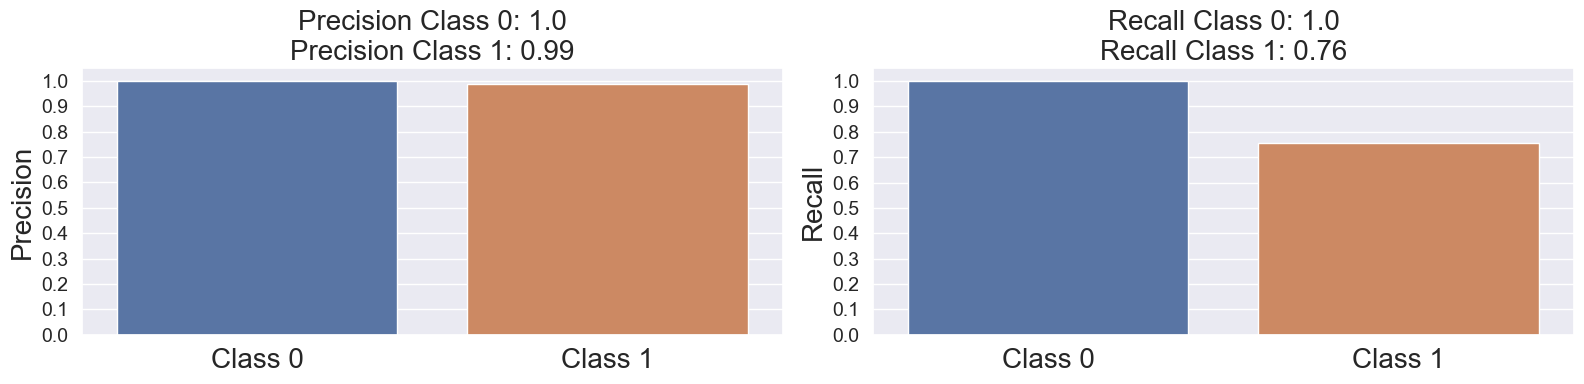

In [33]:
fnc.plot_precision_recall(y_test, y_pred_randfor)

In [34]:
print(classification_report(y_test, y_pred_randfor))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.99      0.76      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962



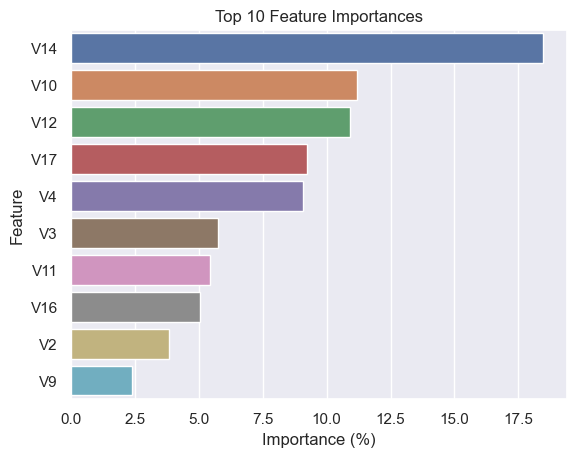

In [35]:
fnc.plot_feature_importances(randfor)

## 4.4 XGBoost

In [36]:
# calculating the scale 0's/1's
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

### 4.4.1 XGBoost Classifier

In [37]:
xgbclass = XGBClassifier(scale_pos_weight=scale_pos_weight, random_state=42)
xgbclass.fit(X_train, y_train)
y_pred_xgbclass = xgbclass.predict(X_test)

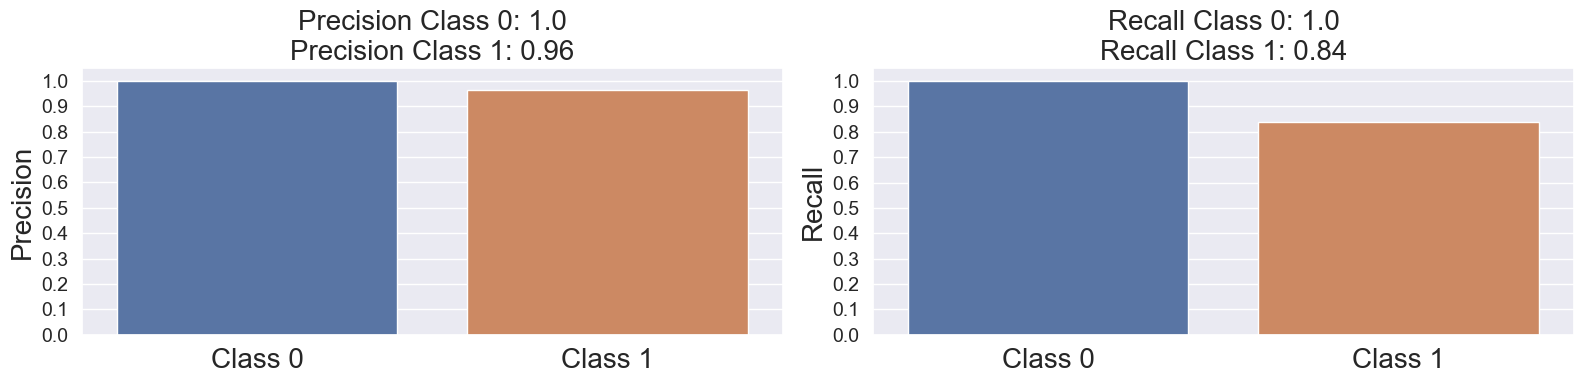

In [38]:
fnc.plot_precision_recall(y_test, y_pred_xgbclass)

In [39]:
print(classification_report(y_test, y_pred_xgbclass))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.84      0.90        98

    accuracy                           1.00     56962
   macro avg       0.98      0.92      0.95     56962
weighted avg       1.00      1.00      1.00     56962



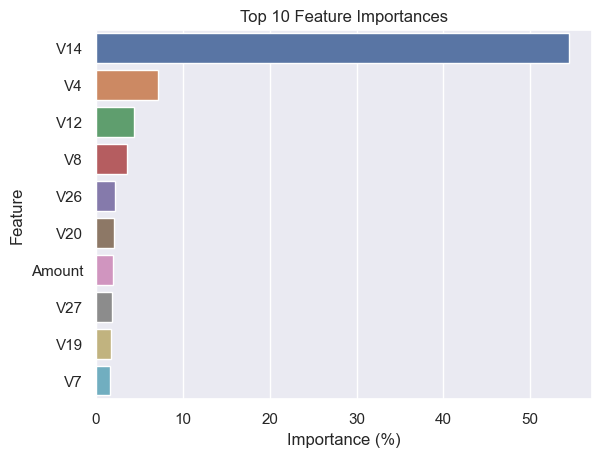

In [40]:
fnc.plot_feature_importances(xgbclass)

### 4.4.2 XGBoost Random Forest Classifier

In [41]:
xgbrfclass = XGBRFClassifier(scale_pos_weight=scale_pos_weight, random_state=42)
xgbrfclass.fit(X_train, y_train)
y_pred_xgbrf = xgbrfclass.predict(X_test)

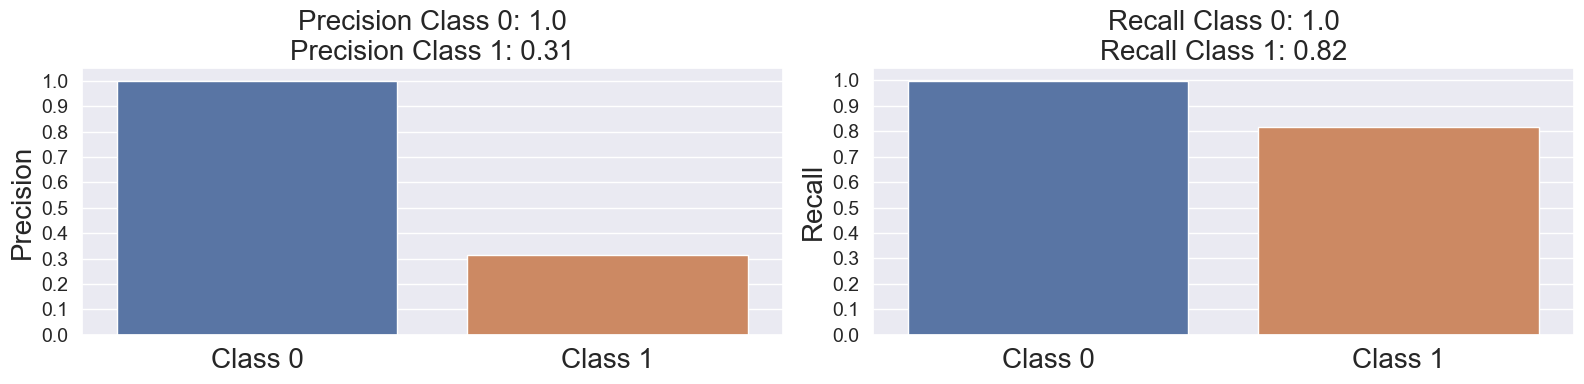

In [42]:
fnc.plot_precision_recall(y_test, y_pred_xgbrf)

In [43]:
print(classification_report(y_test, y_pred_xgbrf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.31      0.82      0.45        98

    accuracy                           1.00     56962
   macro avg       0.66      0.91      0.73     56962
weighted avg       1.00      1.00      1.00     56962



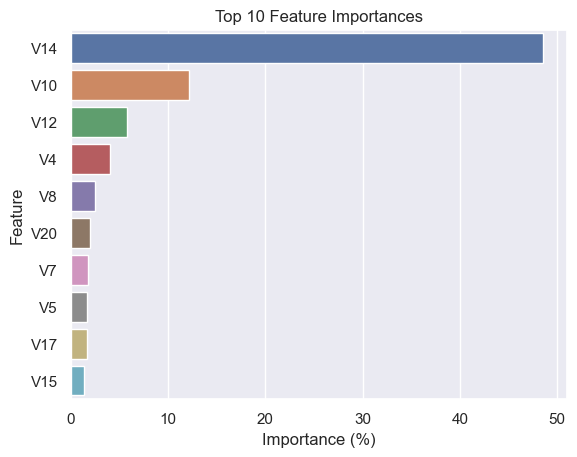

In [44]:
fnc.plot_feature_importances(xgbrfclass)

# 5 Evaluating the results

In [46]:
# Calculate precision and recall values for different threshold levels (considering minority class)
lreg_precision, lreg_recall, _ = precision_recall_curve(y_test, logreg.predict_proba(X_test)[:, -1])
lregbal_precision, lregbal_recall, _ = precision_recall_curve(y_test, logreg_bal.predict_proba(X_test)[:, -1])
dtree_precision, dtree_recall, _ = precision_recall_curve(y_test, dtree.predict_proba(X_test)[:, -1])
rf_precision, rf_recall, _ = precision_recall_curve(y_test, randfor.predict_proba(X_test)[:, -1])
xgb_precision, xgb_recall, _ = precision_recall_curve(y_test, xgbclass.predict_proba(X_test)[:, -1])
xgbrf_precision, xgbrf_recall, _ = precision_recall_curve(y_test, xgbrfclass.predict_proba(X_test)[:, -1])

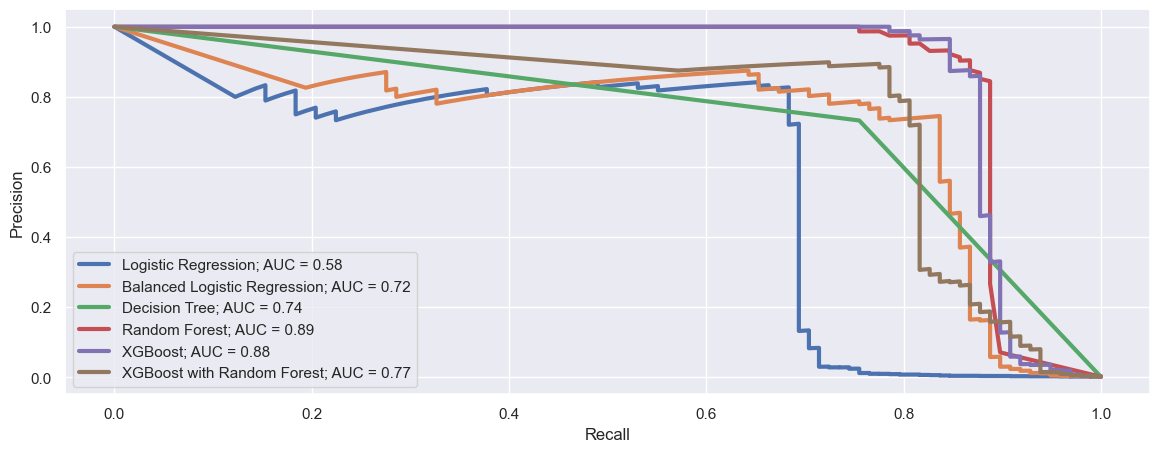

In [54]:
# Plot the precision-recall curves
plt.figure(figsize=(14, 5))
plt.plot(lreg_recall, lreg_precision, label=f'Logistic Regression; AUC = {auc(lreg_recall, lreg_precision):.2f}', linewidth=3)
plt.plot(lregbal_recall, lregbal_precision, label=f'Balanced Logistic Regression; AUC = {auc(lregbal_recall, lregbal_precision):.2f}', linewidth=3)
plt.plot(dtree_recall, dtree_precision, label=f'Decision Tree; AUC = {auc(dtree_recall, dtree_precision):.2f}', linewidth=3)
plt.plot(rf_recall, rf_precision, label=f'Random Forest; AUC = {auc(rf_recall, rf_precision):.2f}', linewidth=3)
plt.plot(xgb_recall, xgb_precision, label=f'XGBoost; AUC = {auc(xgb_recall, xgb_precision):.2f}', linewidth=3)
plt.plot(xgbrf_recall, xgbrf_precision, label=f'XGBoost with Random Forest; AUC = {auc(xgbrf_recall, xgbrf_precision):.2f}', linewidth=3)

# Add axis labels and legend
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')

plt.show()

Analysing each area under the curve (AUC) of Precision vs. Recall plot for each trained model, it is possible to notice that RandomForest and XGBoostClassifier were the best models trained, followed by XGBoost with Random Forest, Decision Tree and LogisticRegression (balanced classes) models.

Following, the analysis shall be made as to achieve the best financial results for the business (detecting fraudulent transactions).

In [55]:
# Calculating the number fraudulent transactions of the test set
print(f"Number of fraudulent transactions on the test set: { (y_test == 1).sum() }.")

Number of fraudulent transactions on the test set: 98.


Considering that each transaction labeled as fraud should generate a second authentication procedure to ensure a final legit transaction (assuming a $1 cost per extra authentication procedure), let us evaluate the models metrics concerning their respective:
- Fraudulent caught losses prevented (True Positives)                > Revenue
- Fraudulent not caught losses (False negatives)                     > Cost
- Transactions labeled as fraud (False positives + True positives)   > Cost

## 5.1 Logistic Regression  unbalanced class Results

In [56]:
fnc.calculate_net_revenue(X_test["Amount"], y_test, y_pred_logreg)

Fraudulent Caught losses prevented: $7562.79
Fraudulent not Caught losses: $8515.61
Transactions labeled as fraud (cost due to second authentication procedures): $96.00
Net Revenue Fraud detection model: $-1048.82


## 5.2 Logistic Regression balanced class Results

In [57]:
fnc.calculate_net_revenue(X_test["Amount"], y_test, y_pred_logreg_bal)

Fraudulent Caught losses prevented: $13165.65
Fraudulent not Caught losses: $2912.75
Transactions labeled as fraud (cost due to second authentication procedures): $2155.00
Net Revenue Fraud detection model: $8097.90


## 5.3 Decision tree Results

In [58]:
fnc.calculate_net_revenue(X_test["Amount"], y_test, y_pred_dtree)

Fraudulent Caught losses prevented: $10796.30
Fraudulent not Caught losses: $5282.10
Transactions labeled as fraud (cost due to second authentication procedures): $101.00
Net Revenue Fraud detection model: $5413.20


## 5.4 Random forest Results

In [59]:
fnc.calculate_net_revenue(X_test["Amount"], y_test, y_pred_randfor)

Fraudulent Caught losses prevented: $11077.85
Fraudulent not Caught losses: $5000.55
Transactions labeled as fraud (cost due to second authentication procedures): $75.00
Net Revenue Fraud detection model: $6002.30


## 5.5 XGBoost Classifier Results

In [60]:
fnc.calculate_net_revenue(X_test["Amount"], y_test, y_pred_xgbclass)

Fraudulent Caught losses prevented: $12345.70
Fraudulent not Caught losses: $3732.70
Transactions labeled as fraud (cost due to second authentication procedures): $85.00
Net Revenue Fraud detection model: $8528.00


## 5.6 XGBoost Random Forest Classifier Results

In [61]:
fnc.calculate_net_revenue(X_test["Amount"], y_test, y_pred_xgbrf)

Fraudulent Caught losses prevented: $11141.69
Fraudulent not Caught losses: $4936.71
Transactions labeled as fraud (cost due to second authentication procedures): $255.00
Net Revenue Fraud detection model: $5949.98


# 6 Results Summary

In [62]:
predictions = [y_pred_logreg, y_pred_logreg_bal, y_pred_dtree, y_pred_randfor, y_pred_xgbclass, y_pred_xgbrf]
models = ["LogReg", "LogReg_balanced", "DecisionTree", "RandomForest", "XGBoostClass", "XGBoostRF"]

results = {}
for i, pred in enumerate(predictions):
    results[models[i]] = fnc.calculate_net_revenue(X_test["Amount"], y_test, pred, results=False)

In [63]:
summary = pd.DataFrame(
    results, 
    index= ["Fraudulent Caught losses prevented", "Fraudulent not Caught losses", "Transactions labeled as fraud", "Net Revenue Fraud detection model"]
    )

In [64]:
summary

,LogReg,LogReg_balanced,DecisionTree,RandomForest,XGBoostClass,XGBoostRF
Fraudulent Caught losses prevented,7562.79,13165.65,10796.3,11077.85,12345.7,11141.69
Fraudulent not Caught losses,8515.61,2912.75,5282.1,5000.55,3732.7,4936.71
Transactions labeled as fraud,96.00,2155.00,101.0,75.00,85.0,255.00
Net Revenue Fraud detection model,-1048.82,8097.90,5413.2,6002.30,8528.0,5949.98


Considering the business scenario proposed, XGBoostClassifier presented the best financial return to the businees of detecting fraudulent credit card transactions.

# Future work

The business selected baseline model (XGBoost Classifier) could have its hyperparameters fine-tuned, following this steps:
- **Define the search space**: Decide which hyperparameters to tune, and define a search space for each hyperparameter. For example, learning_rate, max_depth and n_estimators hyperparameters. Then, define a search space for each.

- **Choose a search algorithm**: Select a search algorithm to explore the hyperparameter search space. Popular choices include Random Search and Grid Search.